In [1]:
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import scipy.signal as sg
from scipy import linalg
import seaborn as sns
import pandas as pd
import numpy as np
import graphviz
import warnings
import random
import time
import glob
import sys
import os

In [6]:
%time train = pd.read_csv('../input/train.csv',nrows=4000000,dtype = {'acoustic_data': np.int16, 'time_to_failure': np.float64} ) # float32 is enough :)

CPU times: user 1.01 s, sys: 236 ms, total: 1.24 s
Wall time: 1.26 s


In [7]:
train.shape[0]

4000000

In [8]:
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


## 小波包变换

In [9]:
import pywt

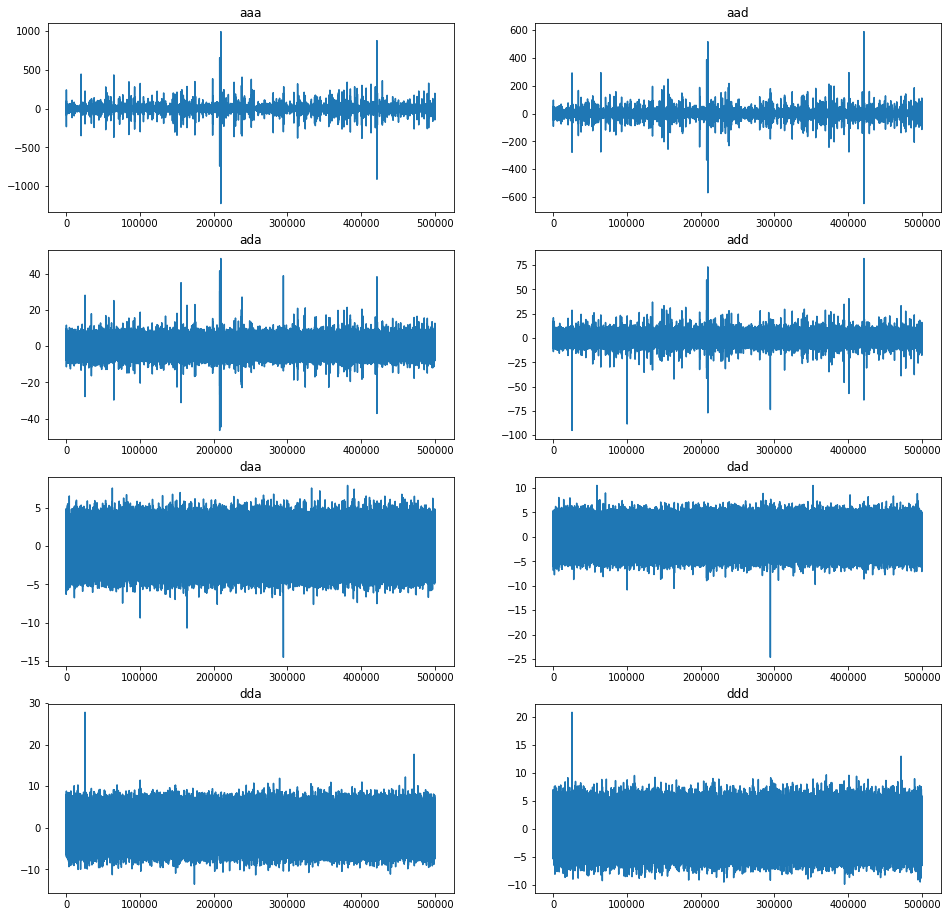

In [10]:
wtp_data=train.acoustic_data
wtp_data=wtp_data-wtp_data.mean()
maxlevel=3
wavelet='db4'
wp=pywt.WaveletPacket(data=wtp_data.values.reshape(len(wtp_data)),wavelet=wavelet,mode='symmetric',maxlevel=maxlevel)
nodename=[node.path for node in wp.get_level(maxlevel, 'natural')]
fig,ax=plt.subplots(int(np.power(2,maxlevel)/2),2,figsize=(16,int(4*(np.power(2,maxlevel)/2))))
j=0
k=0
for i in nodename:
    ax[k][j].plot(wp[i].data)
    ax[k][j].set_title(i)
    j+=1
    if j>1:
        k+=1
        j=0
del wtp_data,wp

#### 分析：db4小波3层分解，后4个节点可以判定为噪声数据，前四个节点信息有用。降噪？

####  